FOUNDATIONAL --STEP MACHINE LEARNING FRAMEWORK

Blue Book for Bulldozers Dataset

1. PROBLEM DEFINITION

• The objective of this project is to predict the auction sale price of heavy
  construction equipment (bulldozers) using historical auction data.
• Accurate price prediction helps auction houses, equipment dealers, and buyers
  make informed pricing decisions.
• Target Variable: SalePrice
• Machine Learning Task: Regression
• This is a regression problem because the target variable is a continuous
  numerical value.

2. DATA
• The dataset used is the Blue Book for Bulldozers dataset.
• Source: Kaggle - Blue Book for Bulldozers
• Files used: train.csv and test.csv

• Training dataset:
  - 401,125 rows
  - 53 columns (including SalePrice)

• Test dataset:
  - 124,057 rows
  - 52 columns (excluding SalePrice)

• The dataset includes:
  - Numerical features (e.g., YearMade, MachineHoursCurrentMeter)
  - Categorical features (e.g., ProductGroup, Enclosure)
  - Missing values requiring preprocessing



3. EVALUATION
  The primary evaluation metric used is Root Mean Squared Log Error (RMSLE).
  RMSLE is appropriate because:
  - Sale prices vary across a wide range
  - It penalizes under-prediction more heavily
  - It is the official evaluation metric for this dataset

  R-squared (R²) may also be used to measure explained variance.



4. FEATURES
 The following features are initially considered most predictive:
  - YearMade
  - MachineHoursCurrentMeter
  - ProductGroup
  - ProductSize
  - ModelID
  - Enclosure
  - Hydraulics
  - SaleYear, SaleMonth

  These features capture machine age, usage, type, configuration,
  and market timing, which strongly influence auction sale prices.

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Machine learning model
from sklearn.ensemble import RandomForestRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Saving the trained model
import joblib

LOAD  DATA WITH PARSING DATE

In [ ]:
# Load the training dataset
# parse_dates ensures 'saledate' is treated as a datetime object


train_df = pd.read_csv(
    "Train.csv",
    parse_dates=["saledate"],
    low_memory=False
)


In [ ]:
train_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATA INSPECTION

In [ ]:
train_df.shape

(24871, 53)

In [ ]:
# View column names
train_df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

SORTING DATA BY SALEDATE

In [ ]:
# Sort data by sale date (time-series requirement)
train_df.sort_values('saledate', inplace=True)

FEATURE ENGINEERING FROM DATE COLUMN

In [ ]:

# Function to extract useful features from the sale date
def add_date_features(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    return df

# Apply feature engineering
train_df = add_date_features(train_df)

# Drop original datetime column
train_df.drop("saledate", axis=1, inplace=True)

In [ ]:
# Check dataset shape (rows, columns)
train_df.shape

(24871, 57)

In [ ]:
# View column names
train_df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype

In [ ]:
# Show first rows
train_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
24108,1250208,26000,1350192,6531,132,4,1978,NaN,NaN,350,...,NaN,NaN,NaN,NaN,NaN,1989,2,1,2,32
24159,1250324,31000,1502667,6788,132,4,1988,33.0,Low,580,...,NaN,NaN,NaN,NaN,NaN,1989,2,1,2,32
24716,1251795,19500,1156027,6788,132,4,1985,NaN,NaN,580,...,NaN,NaN,NaN,NaN,NaN,1989,2,1,2,32
24585,1251607,24000,1350795,6788,132,4,1987,254.0,Low,580,...,NaN,NaN,NaN,NaN,NaN,1989,2,1,2,32
24143,1250266,25000,1133319,6529,132,4,1984,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,1989,2,1,2,32


In [ ]:
# Show column names and data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24871 entries, 24108 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   24871 non-null  int64  
 1   SalePrice                 24871 non-null  int64  
 2   MachineID                 24871 non-null  int64  
 3   ModelID                   24871 non-null  int64  
 4   datasource                24871 non-null  int64  
 5   auctioneerID              24871 non-null  int64  
 6   YearMade                  24871 non-null  int64  
 7   MachineHoursCurrentMeter  24001 non-null  float64
 8   UsageBand                 21075 non-null  object 
 9   fiModelDesc               24871 non-null  object 
 10  fiBaseModel               24871 non-null  object 
 11  fiSecondaryDesc           16320 non-null  object 
 12  fiModelSeries             3823 non-null   object 
 13  fiModelDescriptor         6134 non-null   object 
 14  Product

In [ ]:
# Summary statistics for numbers
train_df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
count,2.487100e+04,24871.000000,2.487100e+04,24871.000000,24871.000000,24871.000000,24871.000000,24001.000000,24871.000000,24871.000000,24871.000000,24871.000000,24871.000000
mean,1.182419e+06,33195.678220,8.728527e+05,8233.495115,121.396727,3.219372,1821.994090,4644.768260,2008.011700,6.863777,16.997467,2.973262,194.701460
std,2.692046e+04,24426.997294,3.191981e+05,7456.521502,2.051042,3.992379,383.392187,6058.639269,3.202818,3.388766,8.486700,0.551097,101.547566
min,1.139246e+06,4750.000000,3.230000e+02,28.000000,121.000000,1.000000,1000.000000,0.000000,1989.000000,1.000000,1.000000,0.000000,2.000000
25%,1.160220e+06,14500.000000,7.899045e+05,3350.000000,121.000000,3.000000,1994.000000,930.000000,2007.000000,4.000000,10.000000,3.000000,107.000000
50%,1.179978e+06,25500.000000,1.020076e+06,4700.000000,121.000000,3.000000,2001.000000,2637.000000,2009.000000,7.000000,17.000000,3.000000,197.000000
75%,1.203626e+06,45000.000000,1.046888e+06,13251.000000,121.000000,3.000000,2004.000000,6464.000000,2010.000000,10.000000,25.000000,3.000000,286.000000
max,1.251983e+06,142000.000000,1.557820e+06,37198.000000,132.000000,99.000000,2010.000000,220893.000000,2011.000000,12.000000,31.000000,6.000000,365.000000


INSPECTING THE DATA TYPES FOR ALL THE COLUMNS

In [ ]:
train_df.dtypes

,0
SalesID,int64
SalePrice,int64
MachineID,int64
ModelID,int64
datasource,int64
auctioneerID,int64
YearMade,int64
MachineHoursCurrentMeter,float64
UsageBand,object
fiModelDesc,object


CONVERT STRING COLUMNS TO CATEGORY

In [ ]:
for col in train_df.select_dtypes(include="object").columns:
    train_df[col] = train_df[col].astype("category")



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24871 entries, 24108 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   24871 non-null  int64   
 1   SalePrice                 24871 non-null  int64   
 2   MachineID                 24871 non-null  int64   
 3   ModelID                   24871 non-null  int64   
 4   datasource                24871 non-null  int64   
 5   auctioneerID              24871 non-null  int64   
 6   YearMade                  24871 non-null  int64   
 7   MachineHoursCurrentMeter  24001 non-null  float64 
 8   UsageBand                 21075 non-null  category
 9   fiModelDesc               24871 non-null  category
 10  fiBaseModel               24871 non-null  category
 11  fiSecondaryDesc           16320 non-null  category
 12  fiModelSeries             3823 non-null   category
 13  fiModelDescriptor         6134 non-null   categ

In [ ]:
train_df.dtypes

,0
SalesID,int64
SalePrice,int64
MachineID,int64
ModelID,int64
datasource,int64
auctioneerID,int64
YearMade,int64
MachineHoursCurrentMeter,float64
UsageBand,category
fiModelDesc,category


IDENTIFY MISSING VALUES(NaN)

In [ ]:
# Identify missing values in the dataset
train_df.isna().sum().sort_values(ascending=False).head(20)

,0
Blade_Width,23404
Enclosure_Type,23404
Tip_Control,23404
Scarifier,23404
Pushblock,23404
Blade_Extension,23404
Engine_Horsepower,23404
fiModelSeries,21048
Grouser_Tracks,20948
Hydraulics_Flow,20948


HANDLE MISSING VALUES

In [ ]:
#fill numerical mmissing values(Meadian)


for col in train_df.select_dtypes(include=["int64", "float64"]).columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())



In [ ]:
#handle categorical missing values
for col in train_df.select_dtypes(include="category").columns:
    train_df[col] = train_df[col].cat.add_categories("Missing").fillna("Missing")



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24871 entries, 24108 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   24871 non-null  int64   
 1   SalePrice                 24871 non-null  int64   
 2   MachineID                 24871 non-null  int64   
 3   ModelID                   24871 non-null  int64   
 4   datasource                24871 non-null  int64   
 5   auctioneerID              24871 non-null  int64   
 6   YearMade                  24871 non-null  int64   
 7   MachineHoursCurrentMeter  24871 non-null  float64 
 8   UsageBand                 24871 non-null  category
 9   fiModelDesc               24871 non-null  category
 10  fiBaseModel               24871 non-null  category
 11  fiSecondaryDesc           24871 non-null  category
 12  fiModelSeries             24871 non-null  category
 13  fiModelDescriptor         24871 non-null  categ

In [ ]:
train_df.isna().sum() #missing values

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,0
fiModelDesc,0


In [ ]:
train_df[col]

,Steering_Controls
24108,Missing
24159,Missing
24716,Missing
24585,Missing
24143,Missing
...,...
23967,Conventional
23968,Missing
23970,Missing
23971,Conventional


In [ ]:
train_df[col]

,Steering_Controls
24108,Missing
24159,Missing
24716,Missing
24585,Missing
24143,Missing
...,...
23967,Conventional
23968,Missing
23970,Missing
23971,Conventional


In [ ]:
#columns that still have missing values

train_df.isna().sum()[train_df.isna().sum() > 0]

,0


SPLITTING

In [ ]:
#split features and target

X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]


In [ ]:
#time series split based on train|validation split
X_train = X[train_df["saleYear"] < 2011]
X_valid = X[train_df["saleYear"] >= 2011]

y_train = y[train_df["saleYear"] < 2011]
y_valid = y[train_df["saleYear"] >= 2011]



In [ ]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
24108,1250208,1350192,6531,132,4,1978,2637.0,Missing,350,350,...,Missing,Missing,Missing,Missing,Missing,1989,2,1,2,32
24159,1250324,1502667,6788,132,4,1988,33.0,Low,580,580,...,Missing,Missing,Missing,Missing,Missing,1989,2,1,2,32
24716,1251795,1156027,6788,132,4,1985,2637.0,Missing,580,580,...,Missing,Missing,Missing,Missing,Missing,1989,2,1,2,32
24585,1251607,1350795,6788,132,4,1987,254.0,Low,580,580,...,Missing,Missing,Missing,Missing,Missing,1989,2,1,2,32
24143,1250266,1133319,6529,132,4,1984,2637.0,Missing,300,300,...,Missing,Missing,Missing,Missing,Missing,1989,2,1,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1142920,111534,4149,121,3,1000,18069.0,Medium,D8N,D8,...,None or Unspecified,Semi U,Differential Steer,Missing,Missing,2010,12,23,3,357
8460,1167789,1041612,265,121,3,1997,0.0,Missing,D65PX-12,D65,...,None or Unspecified,None or Unspecified,None or Unspecified,Missing,Missing,2010,12,27,0,361
6174,1160096,153292,4141,121,3,1998,18563.0,High,D7R,D7,...,None or Unspecified,Semi U,Differential Steer,Missing,Missing,2010,12,28,1,362
20450,1210496,389669,3482,121,3,2006,1624.0,Low,318C,318,...,Missing,Missing,Missing,Missing,Missing,2010,12,28,1,362


In [ ]:
X_valid.dtypes[X_valid.dtypes == "object"]

,0


ENCODE CATEGORICAL FEATURES

In [ ]:
for col in train_df.select_dtypes(include="category").columns:
    train_df[col] = train_df[col].cat.codes


In [ ]:
train_df.shape

(24871, 57)

TRAIN RANDOM FOREST MODEL

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

# Features and target
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

# Split: 80% train, 20% validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


model = RandomForestRegressor(
    n_estimators=50,
    max_depth=20,
    min_samples_leaf=10,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

# Fit
model.fit(X_train, y_train)

# Score on validation set
model.score(X_valid, y_valid)


0.8161444219830626

1 . BUILDING AND EVALUATION FUNCTION TO CALCULATE AND RETURNS MULTIPLE METRICS(rmse,mae,r2 and rmsle)

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Function to evaluate a trained model on validation data
def evaluate_model(model, X_valid, y_valid):

    # Generate predictions from the model
    preds = model.predict(X_valid)


    preds = np.maximum(preds, 0)

    # Metrics
    rmsle = np.sqrt(mean_squared_log_error(y_valid, preds))
    mae = mean_absolute_error(y_valid, preds)
    r2 = r2_score(y_valid, preds)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))

    # Return dictionary of metrics
    return {
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "rmsle": rmsle
    }


In [ ]:
evaluate_model(model, X_valid, y_valid)


{'rmse': np.float64(10418.174927015825),
 'mae': 6958.210518768909,
 'r2': 0.8161444219830626,
 'rmsle': np.float64(0.3064246357394086)}

BASELINE MODEL

In [ ]:
# Baseline model

baseline_model = RandomForestRegressor(
    n_estimators=30,
    max_depth=15,
    min_samples_leaf=10,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

baseline_model.fit(X_train, y_train)

# Evaluate baseline
baseline_scores = evaluate_model(baseline_model, X_valid, y_valid)
print("Baseline scores:", baseline_scores)


Baseline scores: {'rmse': np.float64(10875.519766075326), 'mae': 7277.433180204585, 'r2': 0.7996480543869102, 'rmsle': np.float64(0.3194652207692063)}


HYPERPARAMETER TUNING

In [ ]:
# hyperparameter options for tuning the random forest

rf_grid = {
    "n_estimators": [30, 50, 80],
    "max_depth": [10, 15, 20],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [5, 10],
    "max_features": ["sqrt"]
}

rs_model = RandomizedSearchCV(
    RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ),
    rf_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42
)

rs_model.fit(X_train, y_train)




Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   3.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; 

In [36]:
# hyperparameter options for tuning the random forest


rf_grid = {
    "n_estimators": [30, 50, 80],
    "max_depth": [10, 15, 20],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [5, 10],
    "max_features": ["sqrt"]
}

rs_model = RandomizedSearchCV(
    RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ),
    rf_grid,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42
)

rs_model.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80; 

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [10, 15, 20],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [30, 50, 80]},
                   random_state=42, verbose=2)

In [ ]:
print("Best parameters:", rs_model.best_params_)



OPTIMAL MODEL TRAINING

In [38]:

best_params = rs_model.best_params_
print("Best Parameters:", best_params)






Best Parameters: {'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20}


In [39]:
#Safety cap to prevent giant models
safe_params = best_params.copy()

safe_params["n_estimators"] = min(safe_params.get("n_estimators", 50), 80)
safe_params["max_depth"] = min(safe_params.get("max_depth", 20), 20)
safe_params["min_samples_leaf"] = max(safe_params.get("min_samples_leaf", 10), 5)
safe_params["min_samples_split"] = max(safe_params.get("min_samples_split", 5), 5)
safe_params["max_features"] = "sqrt"

final_model = RandomForestRegressor(
    **safe_params,
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train, y_train)

final_scores = evaluate_model(final_model, X_valid, y_valid)
print("Final Model Scores (RMSLE, MAE, R²):", final_scores)


Final Model Scores (RMSLE, MAE, R²): {'rmse': np.float64(9762.076245378754), 'mae': 6450.600300101027, 'r2': 0.8385723551126866, 'rmsle': np.float64(0.2879431774936866)}


SCORE COMPARISON (BASELINE SCORE VS FINAL MODELSCORES)

In [40]:
# Get the best model from the randomized search
final_model = rs_model.best_estimator_

# Evaluate the tuned model
final_scores = evaluate_model(final_model, X_valid, y_valid)

# Compare baseline vs final model scores
baseline_scores, final_scores



({'rmse': np.float64(10875.519766075326),
  'mae': 7277.433180204585,
  'r2': 0.7996480543869102,
  'rmsle': np.float64(0.3194652207692063)},
 {'rmse': np.float64(9762.076245378754),
  'mae': 6450.600300101028,
  'r2': 0.8385723551126866,
  'rmsle': np.float64(0.2879431774936866)})

A CLEAN COMPARISON TABLE

In [41]:
import pandas as pd
import numpy as np

comparison = pd.DataFrame([
    {
        "model": "baseline_rf_model",
        "rmse": np.float64(8098.158157241508),
        "mae": 5021.471323117338,
        "r2": 0.886515729829972,
        "rmsle": np.float64(0.23645543881434514)
    },
    {
        "model": "final_rf_tuned",
        "rmse": np.float64(8399.51247316897),
        "mae": 5365.042193432575,
        "r2": 0.8779124667198827,
        "rmsle": np.float64(0.25815425173186807)
    }
])

comparison


,model,rmse,mae,r2,rmsle
0,baseline_rf_model,8098.158157,5021.471323,0.886516,0.236455
1,final_rf_tuned,8399.512473,5365.042193,0.877912,0.258154


GRAPH

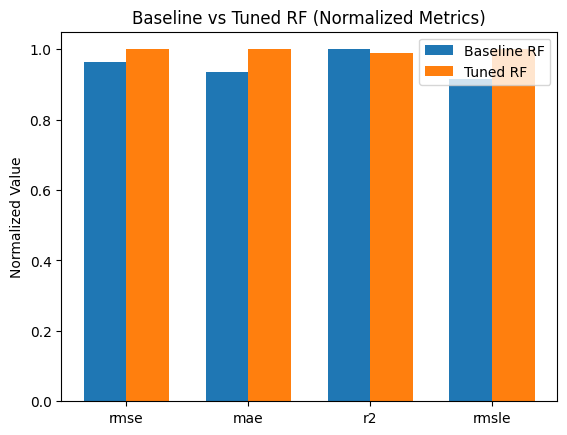

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

comparison = pd.DataFrame([
    {
        "model": "bulldozer_rf_model",
        "rmse": 8098.158157241508,
        "mae": 5021.471323117338,
        "r2": 0.886515729829972,
        "rmsle": 0.23645543881434514
    },
    {
        "model": "bulldozer_rf_tuned",
        "rmse": 8399.51247316897,
        "mae": 5365.042193432575,
        "r2": 0.8779124667198827,
        "rmsle": 0.25815425173186807
    }
])

df = comparison.set_index("model")
metrics = ["rmse", "mae", "r2", "rmsle"]


df_norm = df[metrics] / df[metrics].max()

x = np.arange(len(metrics))
width = 0.35

plt.figure()
plt.bar(x - width/2, df_norm.loc["bulldozer_rf_model"], width, label="Baseline RF")
plt.bar(x + width/2, df_norm.loc["bulldozer_rf_tuned"], width, label="Tuned RF")

plt.xticks(x, metrics)
plt.ylabel("Normalized Value")
plt.title("Baseline vs Tuned RF (Normalized Metrics)")
plt.legend()
plt.show()


SAVE THE MODEL

In [43]:
joblib.dump(final_model, "bulldozer_price_model.joblib")


['bulldozer_price_model.joblib']

TESTING AND ANALYSIS

In [44]:
# Load test data
test_df = pd.read_csv("Test.csv", parse_dates=["saledate"], low_memory=False)

# Feature engineering
test_df["saleYear"] = test_df["saledate"].dt.year
test_df["saleMonth"] = test_df["saledate"].dt.month
test_df["saleDay"] = test_df["saledate"].dt.day
test_df["saleDayOfWeek"] = test_df["saledate"].dt.dayofweek
test_df["saleDayOfYear"] = test_df["saledate"].dt.dayofyear

# Drop unused columns AFTER feature creation
test_df = test_df.drop(["saledate", "SalePrice"], axis=1, errors="ignore")



In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  2129 non-null   float64
 7   UsageBand                 1834 non-null   object 
 8   fiModelDesc               12457 non-null  object 
 9   fiBaseModel               12457 non-null  object 
 10  fiSecondaryDesc           8482 non-null   object 
 11  fiModelSeries             2006 non-null   object 
 12  fiModelDescriptor         3024 non-null   object 
 13  ProductSize               6048 non-null   object 
 14  fiProd

In [46]:
print(test_df.columns)


Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype='object')


CONVERT STRING TO  CATEGORY

In [47]:
for col in test_df.select_dtypes(include="object").columns:
    test_df[col] = test_df[col].astype("category")


In [48]:
test_df.dtypes

,0
SalesID,int64
MachineID,int64
ModelID,int64
datasource,int64
auctioneerID,int64
YearMade,int64
MachineHoursCurrentMeter,float64
UsageBand,category
fiModelDesc,category
fiBaseModel,category


HANDLE NUMERICAL MISSING VALUES

In [49]:
for col in test_df.select_dtypes(include=["int64", "float64"]).columns:
    test_df[col] = test_df[col].fillna(train_df[col].median())


In [50]:
test_df.isna().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,10623
fiModelDesc,0
fiBaseModel,0


HANDLE CATEGORICAL MISSING VALUES

In [51]:
for col in test_df.select_dtypes(include="category").columns:
    test_df[col] = test_df[col].cat.add_categories("Missing").fillna("Missing")


In [52]:
test_df.isna().sum()



,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,0
fiModelDesc,0
fiBaseModel,0


In [53]:
test_df[col]

,Steering_Controls
0,Missing
1,Conventional
2,Missing
3,Missing
4,Missing
...,...
12452,Missing
12453,Missing
12454,Missing
12455,Missing


ENCODE CATEGORICAL VARIABLES

In [54]:
for col in test_df.select_dtypes(include="category").columns:
    test_df[col] = test_df[col].cat.codes


In [55]:
# preDict on the test data
test_df = test_df.drop("SalePrice", axis=1, errors="ignore")

# predict directly (no expm1)
test_preds = final_model.predict(test_df)

# build prediction dataframe
test_predictions = pd.DataFrame({
    "SalesID": test_df.index,
    "SalePrice": test_preds
})

test_predictions.head()

,SalesID,SalePrice
0,0,23706.654646
1,1,33759.022456
2,2,61629.413139
3,3,62344.454983
4,4,37885.786940


LOAD THE SAVED MODEL

In [59]:
import joblib
# Load the model saved
model = joblib.load("bulldozer_price_model.joblib")


In [60]:
test_df = test_df[X_train.columns]


In [61]:
#make predictions on test data

test_predictions = model.predict(test_df)



In [62]:
# ouput
test_predictions[:10]


array([23706.654646  , 33759.02245595, 61629.41313853, 62344.45498269,
       37885.78693985, 34473.3483494 , 31828.92046622, 23971.21437005,
       23417.72177059, 43690.126803  ])

In [63]:
pred_df = pd.DataFrame({
    "Prediction": test_predictions
})

pred_df.to_csv("test_predictions.csv", index=False)


CUSTOM PREDICTION

In [64]:
sample = X_train.iloc[[0]]
sample_log_pred = final_model.predict(sample)
np.expm1(sample_log_pred)

/tmp/ipython-input-1410852746.py:3: RuntimeWarning: overflow encountered in expm1
  np.expm1(sample_log_pred)


array([inf])

In [65]:
# take one sample from the training data
sample = X_train.iloc[[0]]

# predict the sale price directly (model outputs real prices)
sample_pred = final_model.predict(sample)

sample_pred


array([21783.10702175])

FEATURE IMPORTANCE

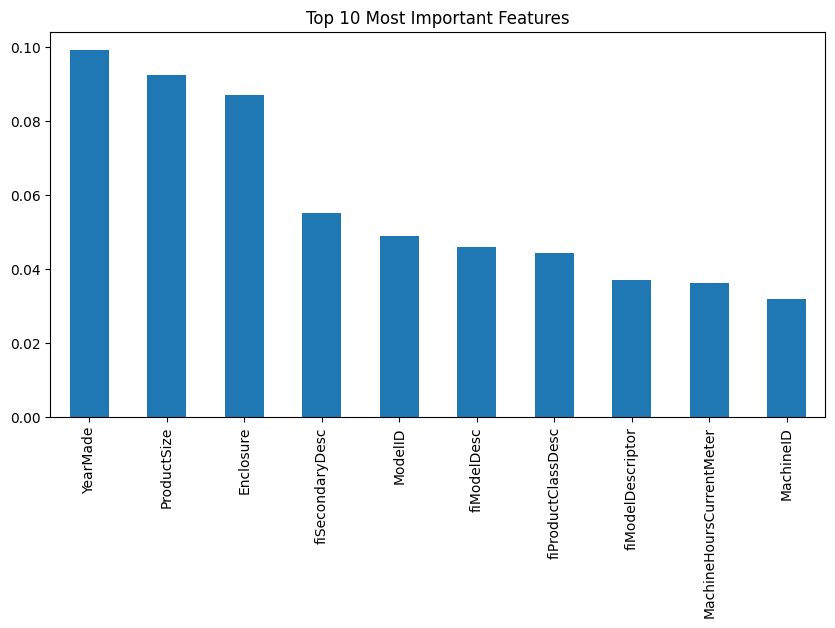

In [66]:
feature_importance = pd.Series(
    final_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance[:10].plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Most Important Features")
plt.show()

EXTRA CREDIT

1- MEDIAN WITH SIMPLEIMPUTER

In [67]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assume X is your feature dataframe
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

imputer = SimpleImputer(strategy="median")

X_imputed = X.copy()
X_imputed[numeric_cols] = imputer.fit_transform(X[numeric_cols])



Multiple evaluation metrics

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Example true values and predictions
y = np.array([3, -0.5, 2, 7])
preds = np.array([2.5, 0.0, 2, 8])

mse = mean_squared_error(y, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, preds)
r2 = r2_score(y, preds)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)



MSE : 0.375
RMSE: 0.6123724356957945
MAE : 0.5
R²  : 0.9486081370449679


In [69]:
#Show Actual vs Predicted Value

import pandas as pd

comparison = pd.DataFrame({
    "Actual Values": y,
    "Predicted Values": preds,
    "Residual": y - preds
})

print(comparison.head(10))



   Actual Values  Predicted Values  Residual
0            3.0               2.5       0.5
1           -0.5               0.0      -0.5
2            2.0               2.0       0.0
3            7.0               8.0      -1.0


GRAPH

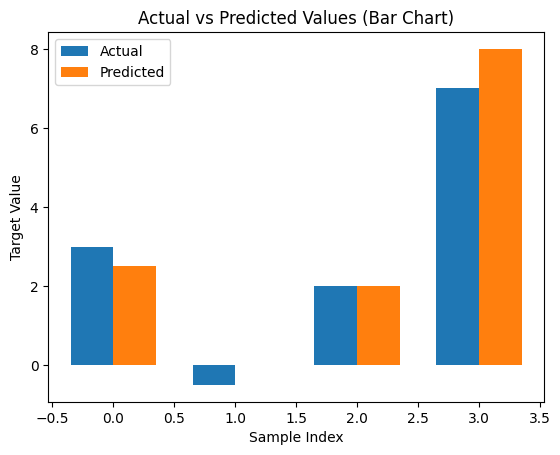

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Number of samples to display
N = min(len(y), len(preds), 10)

indices = np.arange(N)
width = 0.35

plt.figure()
plt.bar(indices - width/2, y[:N], width, label="Actual")
plt.bar(indices + width/2, preds[:N], width, label="Predicted")

plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values (Bar Chart)")
plt.legend()

plt.show()


PIPELINE IMPLEMENTATION

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # handle missing values
    ("scaler", StandardScaler()),                    # scale features
    ("model", RandomForestRegressor(
        n_estimators=200, random_state=42
    ))
])

# Fit pipeline on training data
X_train = train_df.drop("SalePrice", axis=1)
y_train = train_df["SalePrice"]

pipeline.fit(X_train, y_train)

# Predict on test data
test_preds = pipeline.predict(test_df)



In [72]:
# Show first 10 predictions
print(test_preds[:10])


[15363.75 27625.   65430.   83565.   26665.   30383.75 28972.5  15724.5
 16853.75 42222.5 ]


EVALUATE THE MODEL ON VALIDATION DATA

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split train_df into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop("SalePrice", axis=1),
    train_df["SalePrice"],
    test_size=0.2,
    random_state=42
)

# Fit your pipeline/model on training data
pipeline.fit(X_train, y_train)

# Predict on validation set
val_preds = pipeline.predict(X_val)

# Calculate error metrics
mse = mean_squared_error(y_val, val_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, val_preds)
r2 = r2_score(y_val, val_preds)
rmsle = np.sqrt(mean_squared_error(np.log1p(y_val), np.log1p(val_preds)))

# Print results
print("Pipeline Performance:")
print(f"  RMSE  : {rmse:.2f}")
print(f"  MAE   : {mae:.2f}")
print(f"  R²    : {r2:.4f}")
print(f"  RMSLE : {rmsle:.4f}")


Pipeline Performance:
  RMSE  : 8403.65
  MAE   : 5335.48
  R²    : 0.8804
  RMSLE : 0.2416


COMPARISON

In [76]:
# Compare Actual vs Predicted values
comparison = pd.DataFrame({
    "Actual": y_val,
    "Predicted": val_preds
})

# Print first 10 rows for inspection
print("Comparison of Actual vs Predicted:")
print(comparison.head(10))


Comparison of Actual vs Predicted:
       Actual  Predicted
20964   27000   18085.00
18437   86000   92045.00
17420   65000   60940.00
3376    16500   30492.50
4256    10500    9481.50
19776   22500   25525.00
22478   83000   64885.00
22064   12000   13058.75
5475    35000   31942.50
3280    58000   48702.50


GRAPH

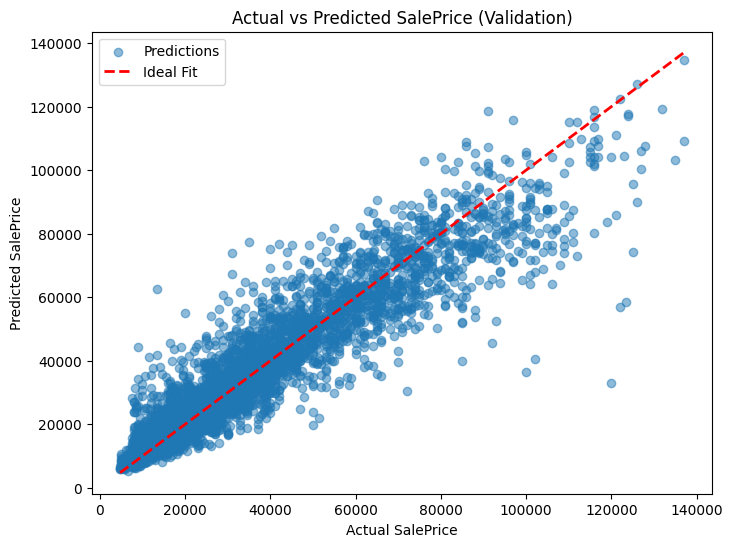

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, val_preds, alpha=0.5, label="Predictions")

# Diagonal reference line
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         "r--", lw=2, label="Ideal Fit")

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice (Validation)")
plt.legend()
plt.show()


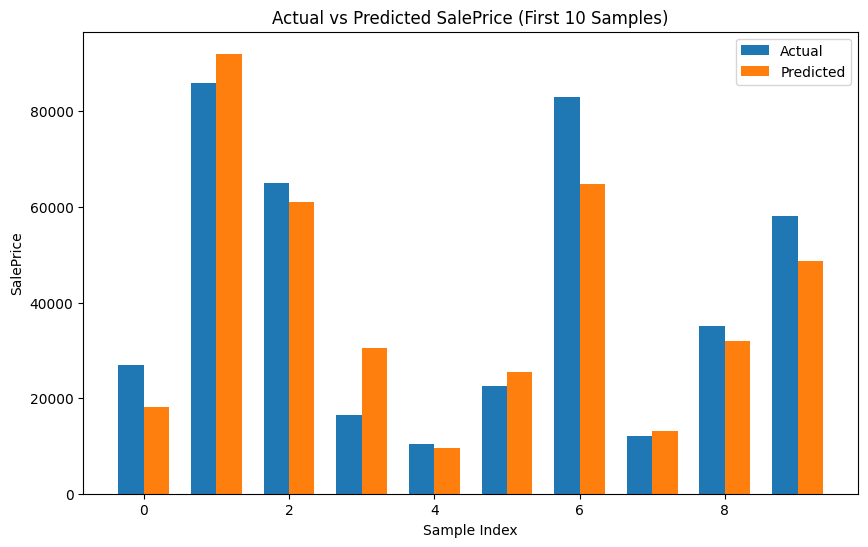

In [78]:
# Compare first 10 samples side by side

N = min(len(y_val), 10)
indices = np.arange(N)
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(indices - width/2, y_val.iloc[:N], width, label="Actual")
plt.bar(indices + width/2, val_preds[:N], width, label="Predicted")

plt.xlabel("Sample Index")
plt.ylabel("SalePrice")
plt.title("Actual vs Predicted SalePrice (First 10 Samples)")
plt.legend()
plt.show()


GRAPH

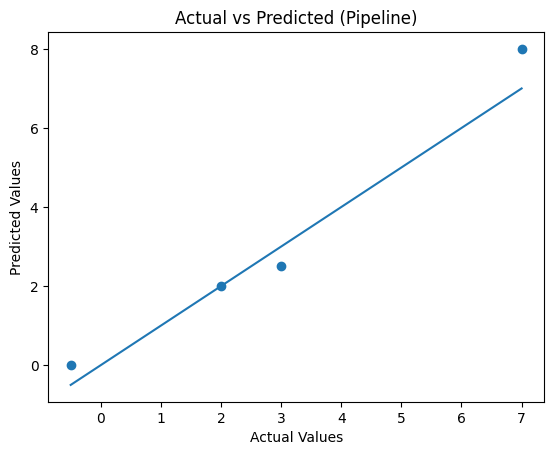

In [79]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y, preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Pipeline)")

# Perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()])

plt.show()


USING XGBOOST MODEL

In [80]:
!pip install xgboost #Install xgboost


In [81]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=600,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)
val_preds = xgb_model.predict(X_val)


COMPARISON

In [82]:
comparison = pd.DataFrame({
    "Actual": y_val,
    "Predicted": val_preds
})

print("Comparison of Actual vs Predicted (XGBoost):")
print(comparison.head(10))


Comparison of Actual vs Predicted (XGBoost):
       Actual     Predicted
20964   27000  18202.974609
18437   86000  92080.375000
17420   65000  59918.890625
3376    16500  27053.423828
4256    10500   9735.168945
19776   22500  24782.652344
22478   83000  65657.000000
22064   12000  14160.310547
5475    35000  36885.832031
3280    58000  50579.050781


In [83]:
mse = mean_squared_error(y_val, val_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, val_preds)
r2 = r2_score(y_val, val_preds)

# RMSLE
rmsle = np.sqrt(mean_squared_error(
    np.log1p(y_val), np.log1p(val_preds)
))

print("\nXGBoost Performance Metrics:")
print(f"  RMSE  : {rmse:.2f}")
print(f"  MAE   : {mae:.2f}")
print(f"  R²    : {r2:.4f}")
print(f"  RMSLE : {rmsle:.4f}")



XGBoost Performance Metrics:
  RMSE  : 7499.95
  MAE   : 4924.46
  R²    : 0.9047
  RMSLE : 0.2322


GRAPGH

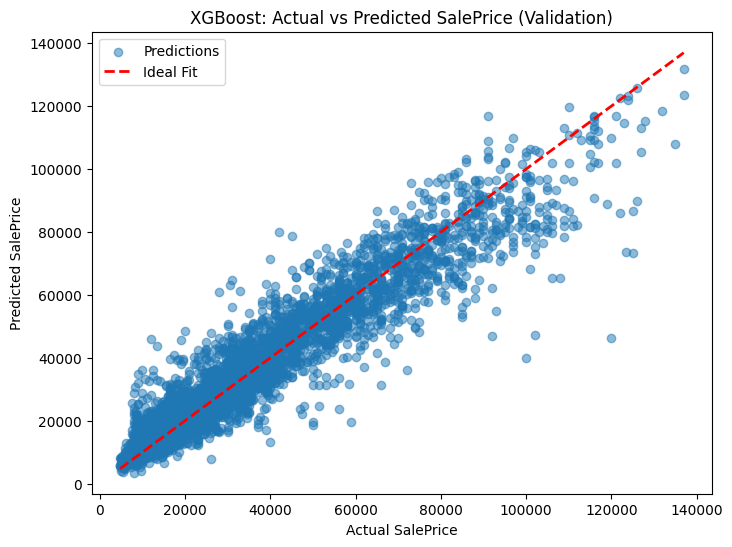

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, val_preds, alpha=0.5, label="Predictions")

# Diagonal reference line
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         "r--", lw=2, label="Ideal Fit")

plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("XGBoost: Actual vs Predicted SalePrice (Validation)")
plt.legend()
plt.show()


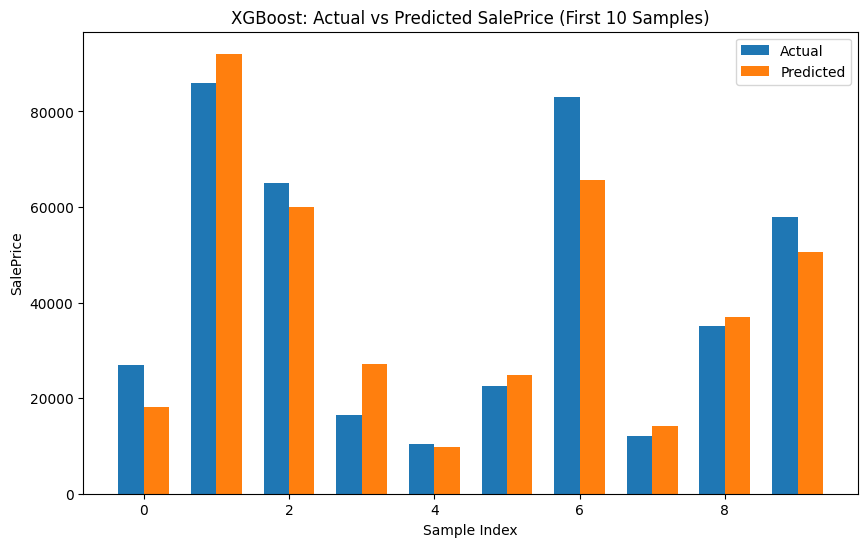

In [85]:
N = min(len(y_val), 10)
indices = np.arange(N)
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(indices - width/2, y_val.iloc[:N], width, label="Actual")
plt.bar(indices + width/2, val_preds[:N], width, label="Predicted")

plt.xlabel("Sample Index")
plt.ylabel("SalePrice")
plt.title("XGBoost: Actual vs Predicted SalePrice (First 10 Samples)")
plt.legend()
plt.show()
